# DSA210 Term Project - Alp Çetintaş - 32550
## 1.Export and Prepare Data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

watch_history_path = "../../youtube_data/geçmiş/izleme geçmişi.json"
search_history_path = "../../youtube_data/geçmiş/arama geçmişi.json"

subscriptions_path = "../../youtube_data/abonelikler/abonelikler.csv"
comments_path = "../../youtube_data/yorumlar/yorumlar.csv"

df = pd.read_json("../../youtube_data/geçmiş/izleme geçmişi.json")

df.head()

,header,title,titleUrl,time,products,activityControls,subtitles,description,details
0,YouTube,https://www.youtube.com/watch?v=IjpEij4y3w0 ad...,https://www.youtube.com/watch?v=IjpEij4y3w0,2024-10-13T20:49:46.901Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
1,YouTube,https://www.youtube.com/watch?v=eaNGNoHJdOA ad...,https://www.youtube.com/watch?v=eaNGNoHJdOA,2024-10-13T20:30:44.963Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
2,YouTube,https://www.youtube.com/watch?v=VNG1F-QueDM ad...,https://www.youtube.com/watch?v=VNG1F-QueDM,2024-10-13T18:44:22.757Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
3,YouTube,https://www.youtube.com/watch?v=QbYShhlyVko ad...,https://www.youtube.com/watch?v=QbYShhlyVko,2024-10-13T16:58:37.767Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
4,YouTube,https://www.youtube.com/watch?v=v6AljLwU_c4 ad...,https://www.youtube.com/watch?v=v6AljLwU_c4,2024-10-13T16:20:54.742Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN


- Some title names aren't shown properly
- Replace these titles with a placeholder - "Not Available"
- Remove " adlı videoyu izlediniz" from the all of the titles

- Not removing hashtags because they might be usefull while categorizing

In [60]:
df['title'] = df['title'].apply(lambda x: "Not Available" if re.search(r"https?://www\.youtube\.com/watch\?v=", x) else x)

df['title'] = df['title'].apply(lambda x: re.sub(r" adlı videoyu izlediniz", "", x).strip() if x != "Not Available" else x)

# name of a row with a missing title
print(df.iloc[0]['title'])

# name of a row with a valid title
print(df.iloc[100]['title'])

Not Available
best video game main character in #castleofalchemists


## 2.Visualization and Explarotary Data Analysis (EDA)
- Let's take a loot at some time habits

In [62]:
# converting the time column to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df.head()

,header,title,titleUrl,time,products,activityControls,subtitles,description,details
0,YouTube,Not Available,https://www.youtube.com/watch?v=IjpEij4y3w0,2024-10-13 20:49:46.901000+00:00,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
1,YouTube,Not Available,https://www.youtube.com/watch?v=eaNGNoHJdOA,2024-10-13 20:30:44.963000+00:00,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
2,YouTube,Not Available,https://www.youtube.com/watch?v=VNG1F-QueDM,2024-10-13 18:44:22.757000+00:00,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
3,YouTube,Not Available,https://www.youtube.com/watch?v=QbYShhlyVko,2024-10-13 16:58:37.767000+00:00,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
4,YouTube,Not Available,https://www.youtube.com/watch?v=v6AljLwU_c4,2024-10-13 16:20:54.742000+00:00,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN


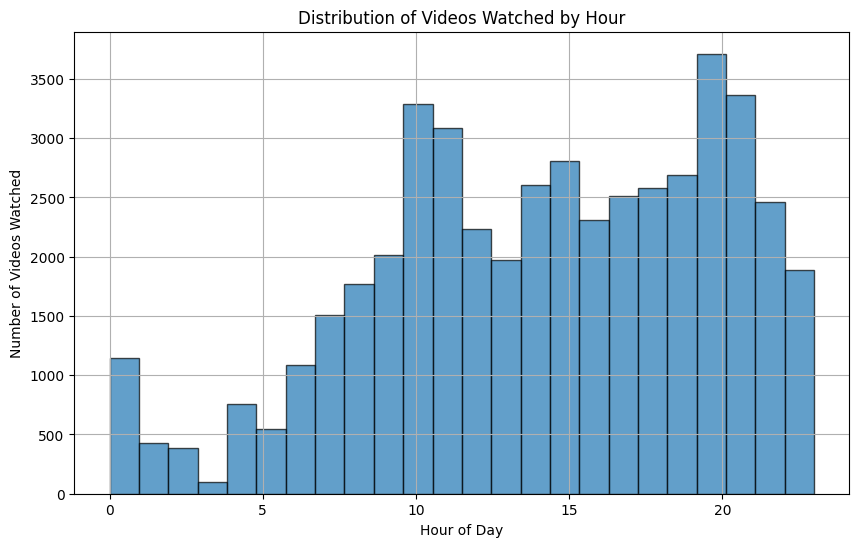

In [68]:
# Plot the histogram of hours
plt.figure(figsize=(10, 6))
plt.hist(df['time'].dt.hour.dropna(), bins=24, edgecolor='k', alpha=0.7)
plt.title('Distribution of Videos Watched by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos Watched')
plt.grid()
plt.show()

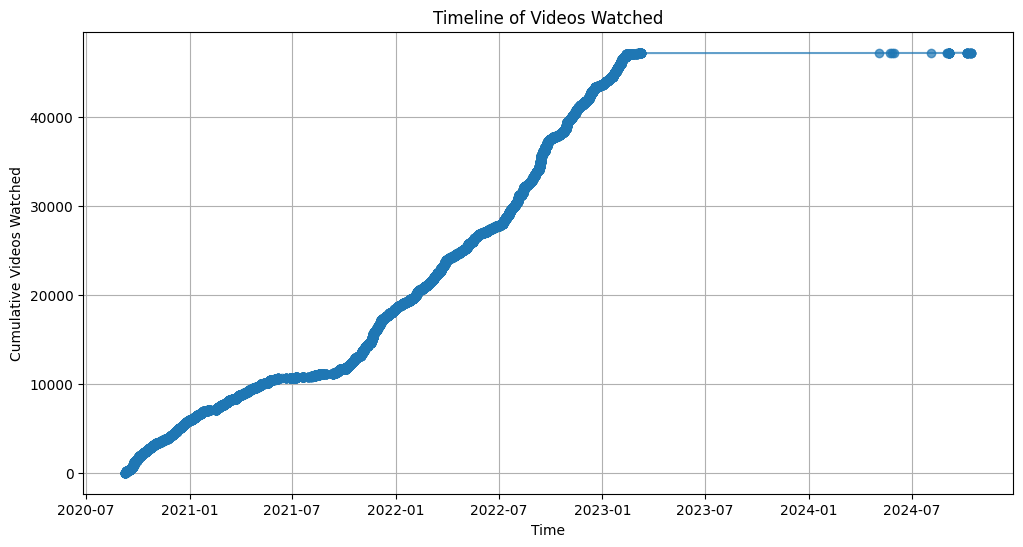

In [70]:
df_sorted = df.dropna(subset=['time']).sort_values(by='time')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['time'], range(len(df_sorted)), marker='o', linestyle='-', alpha=0.7)
plt.title('Timeline of Videos Watched')
plt.xlabel('Time')
plt.ylabel('Cumulative Videos Watched')
plt.grid()
plt.show()